In [1]:
import pandas as pd

In [19]:
sms_spam = pd.read_csv('./data/SMSSpamCollection', sep='\t',header=None, names=['Label', 'SMS'])


In [20]:
sms_spam.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [21]:
sms_spam.columns

Index(['Label', 'SMS'], dtype='object')

In [22]:
sms_spam.head()

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
sms_spam.shape

(5572, 2)

In [24]:
#Randomize the data
data_randomize=sms_spam.sample(frac=1,random_state=42)

# Calculate index for split
index_split=round(len(data_randomize)*0.8)

# Split into training and test sets
training_sets=data_randomize[:index_split].reset_index(drop=True)
test_sets=data_randomize[index_split:len(data_randomize)].reset_index(drop=True)
print("shape of traning set is : ",training_sets.shape)
print("shape of test set is : ",test_sets.shape)

shape of traning set is :  (4458, 2)
shape of test set is :  (1114, 2)


    1 -Data Cleaning
 
When a new message comes in, our multinomial Naive Bayes algorithm will make the classification based on the results it gets to these two equations below, where "w1" is the first word, and w1,w2, ..., wn is the entire message:

<img src="naive_bays.PNG" />

To calculate all these probabilities, we'll first need to perform a bit of data cleaning to bring the data into a format that allows us to easily extract all the information we need. Right now, our training and test sets have this format (the messages below are fictitious to make the example easier to understand):
<img src="text1.PNG" />
To make the calculations easier, we want bring the data to this format (the table below is a transformation of the table you see above):
<img src="text2.PNG" />
Notice in the transformation above:

The SMS column is replaced by a series of new columns that represent unique words from the vocabulary — the vocabulary is the set of unique words from all of our sentences.
Each row describes a single message. The first row has the values spam, 2, 2, 1, 1, 0, 0, 0, 0, 0, which tell us that:
The message is spam.
The word "secret" occurs two times inside the message.
The word "prize" occurs two times inside the message.
The word "claim" occurs one time inside the message.
The word "now" occurs one time inside the message.
The words "coming," "to," "my," "party," and "winner" occur zero times inside the message.
All words in the vocabulary are in lowercase, so "SECRET" and "secret" are considered the same word.
The order of words in the original sentences is lost.
Punctuation is no longer taken into account (for instance, we can't look at the table and conclude that the first message initially had two exclamation marks).


    1 Letter Case and Punctuation
Let's begin the data cleaning process by removing the punctuation and making all the words lowercase.


In [25]:
training_sets.head(3)

,Label,SMS
0,ham,Squeeeeeze!! This is christmas hug.. If u lik ...
1,ham,And also I've sorta blown him off a couple tim...
2,ham,Mmm thats better now i got a roast down me! i...


In [26]:
# After cleaning
training_sets['SMS'] = training_sets['SMS'].str.replace('\W', ' ') # Removes punctuation
training_sets['SMS'] = training_sets['SMS'].str.lower() # to lower case
training_sets.head(3)

,Label,SMS
0,ham,squeeeeeze this is christmas hug if u lik ...
1,ham,and also i ve sorta blown him off a couple tim...
2,ham,mmm thats better now i got a roast down me i ...


2 Creating the Vocabulary
 
Let's now create the vocabulary, which in this context means a list with all the unique words in our training set.

In [27]:
## example for what we will do
a= training_sets['SMS'][0]
b=a.split()
b

['squeeeeeze',
 'this',
 'is',
 'christmas',
 'hug',
 'if',
 'u',
 'lik',
 'my',
 'frndshp',
 'den',
 'hug',
 'me',
 'back',
 'if',
 'u',
 'get',
 '3',
 'u',
 'r',
 'cute',
 '6',
 'u',
 'r',
 'luvd',
 '9',
 'u',
 'r',
 'so',
 'lucky',
 'none',
 'people',
 'hate',
 'u']

In [28]:
## create a function to return vocabulary
def Create_Vocabulary(training_sets):
    training_sets['SMS'] = training_sets['SMS'].str.split()
    vocabulary = [] # vocavocabulary to return
    for sms in training_sets['SMS'] :
        for sting in sms:
            vocabulary.append(sting)
    
    return list(set(vocabulary))
    

In [29]:
# execute the function
vocabulary=Create_Vocabulary(training_sets)
#It looks like there are 7,783 unique words in all the messages of our training set.
len(vocabulary)


7816

In [32]:

word_counts_per_sms = {unique_word: [0] * len(training_sets['SMS']) for unique_word in vocabulary}

for index, sms in enumerate(training_sets['SMS']):
   for word in sms:
      word_counts_per_sms[word][index] += 1

In [33]:
word_counts = pd.DataFrame(word_counts_per_sms)
word_counts.head()

,excellent,banned,fromwrk,08719180219,together,ruthful,bambling,dresser,clocks,linear,...,cheese,lots,leh,xoxo,pobox202,rain,8714714,werebored,08718738034,gravity
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
training_set_clean = pd.concat([training_sets, word_counts], axis=1)
training_set_clean.head()

,Label,SMS,excellent,banned,fromwrk,08719180219,together,ruthful,bambling,dresser,...,cheese,lots,leh,xoxo,pobox202,rain,8714714,werebored,08718738034,gravity
0,ham,"[squeeeeeze, this, is, christmas, hug, if, u, ...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,"[and, also, i, ve, sorta, blown, him, off, a, ...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ham,"[mmm, thats, better, now, i, got, a, roast, do...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ham,"[mm, have, some, kanji, dont, eat, anything, h...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ham,"[so, there, s, a, ring, that, comes, with, the...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 3 Calculating Constants First
 
Now that we're done with cleaning the training set, we can begin coding the spam filter. The multinomial Naive Bayes algorithm will need to answer these two probability questions to be able to classify new messages:
<img src="text3.PNG" />
Some of the terms in the four equations above will have the same value for every new message. We can calculate the value of these terms once and avoid doing the computations again when a new messages comes in. As a start, let's first calculate:

P(Spam) and P(Ham)
NSpam, NHam, NVocabulary
It's important to note that:

NSpam is equal to the number of words in all the spam messages — it's not equal to the number of spam messages, and it's not equal to the total number of unique words in spam messages.
NHam is equal to the number of words in all the non-spam messages — it's not equal to the number of non-spam messages, and it's not equal to the total number of unique words in non-spam messages.
We'll also use Laplace smoothing and set Equation.
alpha=1

In [49]:
# isoletiong the spam and ham messages 

text_clean_spam_sms=training_set_clean[training_set_clean["Label"]=="spam"]
text_clean_ham_sms=training_set_clean[training_set_clean["Label"]=="ham"]

# calculate P(spam) and P(ham)
p_spam=len(text_clean_spam_sms)/len(training_set_clean)
p_ham=len(text_clean_ham_sms)/len(training_set_clean)

# calculate N_Spam is equal to the number of words in all the spam messages
n_words_per_spam_message = text_clean_spam_sms['SMS'].apply(len)
n_spam = n_words_per_spam_message.sum()

# calculate N_Ham is equal to the number of words in all the spam messages
n_words_per_ham_message = text_clean_ham_sms['SMS'].apply(len)
n_ham = n_words_per_spam_message.sum()

#N_vocabulary
n_vocabulary=len(vocabulary)

# Laplace smoothing
alpha = 1

 4 -Calculating Parameters
 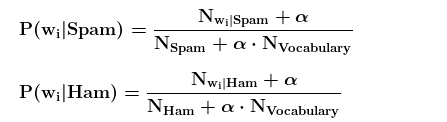
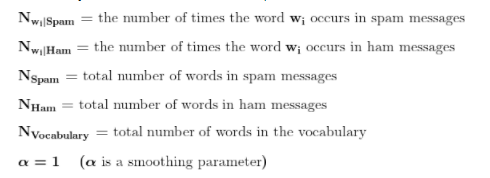

In [51]:
# Initiate parameters
parameters_spam = {unique_word:0 for unique_word in vocabulary}
parameters_ham = {unique_word:0 for unique_word in vocabulary}

# Calculate parameters
for word in vocabulary:
   n_word_given_spam = text_clean_spam_sms[word].sum() # spam_messages already defined
   p_word_given_spam = (n_word_given_spam + alpha) / (n_spam + alpha*n_vocabulary)
   parameters_spam[word] = p_word_given_spam

   n_word_given_ham = text_clean_ham_sms[word].sum() # ham_messages already defined
   p_word_given_ham = (n_word_given_ham + alpha) / (n_ham + alpha*n_vocabulary)
   parameters_ham[word] = p_word_given_ham

In [57]:
parameters_spam

{'excellent': 4.360908813396712e-05,
 'banned': 8.721817626793424e-05,
 'fromwrk': 4.360908813396712e-05,
 '08719180219': 8.721817626793424e-05,
 'together': 4.360908813396712e-05,
 'ruthful': 4.360908813396712e-05,
 'bambling': 4.360908813396712e-05,
 'dresser': 4.360908813396712e-05,
 'clocks': 4.360908813396712e-05,
 'linear': 4.360908813396712e-05,
 'sack': 4.360908813396712e-05,
 'wanted': 8.721817626793424e-05,
 'zed': 0.0002180454406698356,
 'prey': 4.360908813396712e-05,
 'coach': 4.360908813396712e-05,
 '82050': 0.00013082726440190136,
 'jod': 4.360908813396712e-05,
 'tok': 4.360908813396712e-05,
 'non': 4.360908813396712e-05,
 'mobilesvary': 8.721817626793424e-05,
 'm60': 8.721817626793424e-05,
 'clubsaisai': 8.721817626793424e-05,
 'humans': 4.360908813396712e-05,
 'drunkard': 4.360908813396712e-05,
 'realize': 8.721817626793424e-05,
 'monthly': 8.721817626793424e-05,
 'appointment': 4.360908813396712e-05,
 'apologetic': 4.360908813396712e-05,
 'psychologist': 4.360908813396

In [58]:
parameters_ham

{'excellent': 0.00039248179320570405,
 'banned': 4.360908813396712e-05,
 'fromwrk': 8.721817626793424e-05,
 '08719180219': 4.360908813396712e-05,
 'together': 0.0008285726745453753,
 'ruthful': 8.721817626793424e-05,
 'bambling': 8.721817626793424e-05,
 'dresser': 0.00013082726440190136,
 'clocks': 8.721817626793424e-05,
 'linear': 8.721817626793424e-05,
 'sack': 8.721817626793424e-05,
 'wanted': 0.0009593999389472766,
 'zed': 4.360908813396712e-05,
 'prey': 0.00013082726440190136,
 'coach': 8.721817626793424e-05,
 '82050': 4.360908813396712e-05,
 'jod': 8.721817626793424e-05,
 'tok': 0.00013082726440190136,
 'non': 8.721817626793424e-05,
 'mobilesvary': 4.360908813396712e-05,
 'm60': 4.360908813396712e-05,
 'clubsaisai': 4.360908813396712e-05,
 'humans': 8.721817626793424e-05,
 'drunkard': 8.721817626793424e-05,
 'realize': 0.00013082726440190136,
 'monthly': 8.721817626793424e-05,
 'appointment': 0.00017443635253586848,
 'apologetic': 8.721817626793424e-05,
 'psychologist': 8.7218176

 6 -Classifying A New Message
    Now that we have all our parameters calculated, we can start creating the spam filter. The spam filter is understood as a function that:

    Takes in as input a new message (w1, w2, ..., wn).
    Calculates P(Spam|w1, w2, ..., wn) and P(Ham|w1, w2, ..., wn).
    Compares the values of P(Spam|w1, w2, ..., wn) and P(Ham|w1, w2, ..., wn), and:
    If P(Ham|w1, w2, ..., wn) > P(Spam|w1, w2, ..., wn), then the message is classified as ham.
    If P(Ham|w1, w2, ..., wn) < P(Spam|w1, w2, ..., wn), then the message is classified as spam.
    If P(Ham|w1, w2, ..., wn) = P(Spam|w1, w2, ..., wn), then the algorithm may request human 

In [69]:
import re

def classify_test_set(message):
   '''
   message: a string
   '''

   message = re.sub('\W', ' ', message)
   message = message.lower().split()

   p_spam_given_message = p_spam
   p_ham_given_message = p_ham

   for word in message:
      if word in parameters_spam:
         p_spam_given_message *= parameters_spam[word]

      if word in parameters_ham:
         p_ham_given_message *= parameters_ham[word]

   if p_ham_given_message > p_spam_given_message:
      return 'ham'
   elif p_spam_given_message > p_ham_given_message:
      return 'spam'
   else:
      return 'needs human classification'

In [70]:
print(classify_test_set('WINNER!! This is the secret code to unlock the money: C3421.'))


ham


       #7 Measuring the Spam Filter's Accuracy


In [72]:
test_sets['predicted'] = test_sets['SMS'].apply(classify_test_set)
test_sets.head()

,Label,SMS,predicted
0,ham,Was playng 9 doors game and gt racing on phone...,ham
1,ham,I dont thnk its a wrong calling between us,ham
2,ham,All e best 4 ur exam later.,ham
3,ham,Hey what how about your project. Started aha da.,ham
4,ham,"Dunno, my dad said he coming home 2 bring us o...",ham


    We can compare the predicted values with the actual values to measure how good our spam filter is with classifying new messages. To make the measurement, we'll use accuracy as a metric:
    
  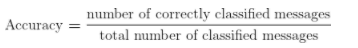

In [99]:
correct = 0
total = test_sets.shape[0]

for row in test_sets.iterrows():
   row = row[1]
   if row['Label'] == row['predicted']:
      correct += 1

print('Correct:', correct)
print('Incorrect:', total - correct)
print('Accuracy:', correct/total)

Correct: 1040
Incorrect: 74
Accuracy: 0.933572710951526


In [106]:
a=test_sets.iterrows()

TypeError: 'generator' object is not subscriptable